Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies 2 in CpE
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **Assignment 7.1 : Classifications and Regression**
**Name** | Gamundoy, Jon Aviv Cloydd S.
**Section** | CPE32S3
**Date Performed**: | 4/07/2024
**Date Submitted**: | 4/10/2024
**Instructor**: | Engr. Roman M. Richard

<hr>

# Datasets and Problem Analysis

## Classification

Dataset: https://archive.ics.uci.edu/dataset/357/occupancy+detection

Problem Analysis:

The dataset contains information about a room and predicts whether it is occupied or not. This knowledge can be useful in different ways, such as investigations, room maintenance for hotels, or just a reminder for package couriers. This can further be used in applications such as monitoring and detection.


## Regression

Dataset: https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

Problem Analysis:

Concrete is one of the most used and important tools in construction and civil engineering. Determining its compressive strenght is vital to ensure structural integrity as it is the capacity of concrete to withstand loads before failure. By accurately predicting this feature, we can avoid disasters and ensure public safety


# Classification

## Loading the Dataset

In [ ]:
# Import necessary libraries
import pandas as pd # For dataframes and operations
import numpy as np # For dealing with null values

occupancy_data = pd.read_csv('datatraining.txt', sep = ',') # Read raw txt file and convert to dataframe

occupancy_data.info() # Check for data types, missing values, and total entries

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


After checking the dataset and confirming that there is no null values. We will now proceed to data pre-processing to clean and transform the data

## Pre-processing

### Removing the Outliers

In [ ]:
occupancy_data.describe() # Check statistics

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


Before we can remove the outliers, we must first format the Data. Since we will not be using the feature "date" we can drop the entire column.

In [ ]:
occupancy_data = occupancy_data.drop(columns='date') # Drop the column "date"
occupancy_data.info() # Check

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    8143 non-null   float64
 1   Humidity       8143 non-null   float64
 2   Light          8143 non-null   float64
 3   CO2            8143 non-null   float64
 4   HumidityRatio  8143 non-null   float64
 5   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 445.3 KB


In [ ]:
occupancy_data.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

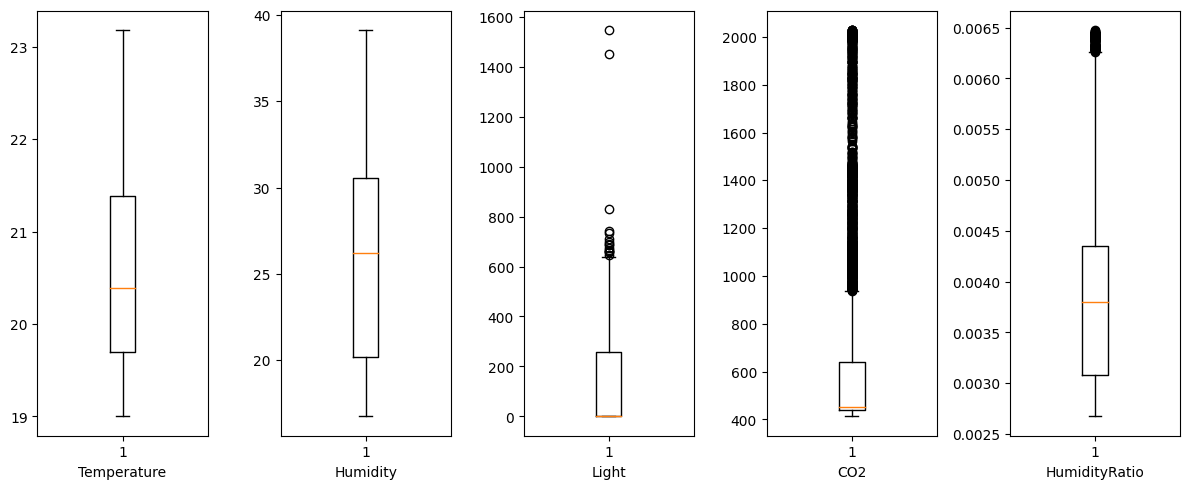

In [ ]:
import matplotlib.pyplot as plt # For plotting

# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(12, 5))
features = occupancy_data.columns

# Create boxplots for each feature
for item in range(5):
  axs[item].boxplot(occupancy_data[features[item]])
  axs[item].set_xlabel(f"{features[item]}")

# Show the boxplots
plt.tight_layout()
plt.show()

We can clearly see that there are outliers in the 'light' feature, we will need to remove this outliers from our dataset.  I will not remove the 'outliers' from CO2 and HumidityRatio due to their volume and can be attributed as 'natural outliers'.

I will be using the `Interquartile Range` to detect and remove outliers

In [ ]:
Q1 = occupancy_data["Light"].quantile(0.25)
Q3 = occupancy_data["Light"].quantile(0.75)

IQR = Q3 - Q1

# Calculation for lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identification of the outliers' index in the dataset
filtered = occupancy_data[(occupancy_data["Light"] >= lower_bound) & (occupancy_data["Light"] <= upper_bound)]

# Creating a set of data WITHOUT the outlieers
clean_occupancy = filtered

# Creation of new dataframe that is free from outliers
clean_occupancy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8128 entries, 1 to 8143
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    8128 non-null   float64
 1   Humidity       8128 non-null   float64
 2   Light          8128 non-null   float64
 3   CO2            8128 non-null   float64
 4   HumidityRatio  8128 non-null   float64
 5   Occupancy      8128 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 444.5 KB


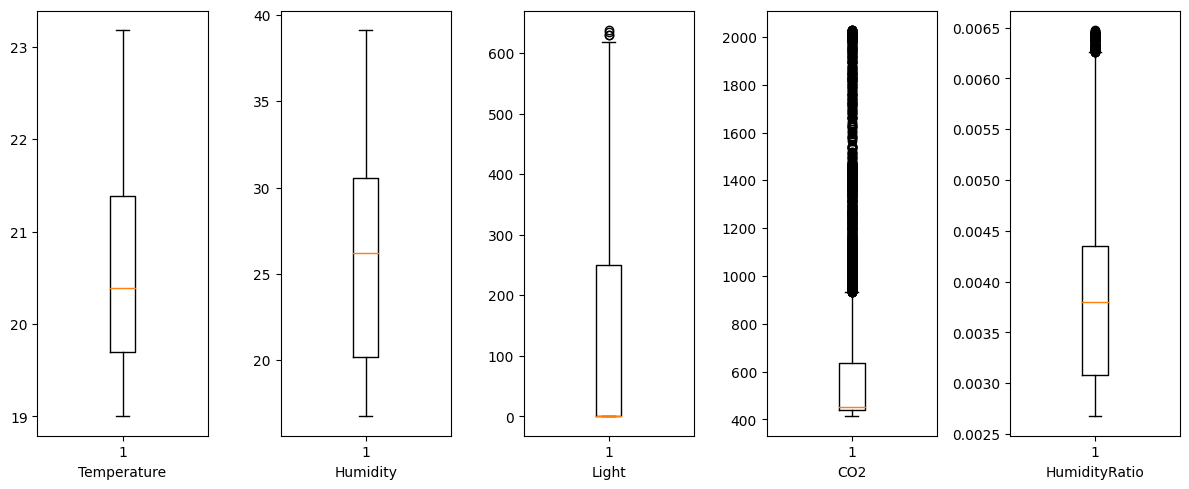

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(12, 5))
features = clean_occupancy.columns

# Create boxplots for each feature
for item in range(5):
  axs[item].boxplot(clean_occupancy[features[item]])
  axs[item].set_xlabel(f"{features[item]}")

# Show the boxplots
plt.tight_layout()
plt.show()

### Balancing of Output Classes

In [ ]:
# Check the data for imbalance in output classes
clean_occupancy["Occupancy"].value_counts()

Occupancy
0    6410
1    1718
Name: count, dtype: int64

Since there is a class imbalance, we will need to resample our data.

I will be using oversampling as undersampling removes almost half of class 0 data

In [ ]:
attributes = clean_occupancy.columns.difference(['Occupancy']) # Select the input attributes
print(attributes)

Index(['CO2', 'Humidity', 'HumidityRatio', 'Light', 'Temperature'], dtype='object')


In [ ]:
# Import hte RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

# Determine the predictor nad target variables
target_var = clean_occupancy["Occupancy"]

attributes = clean_occupancy.columns.difference(['Occupancy']) # Select the input attributes
input = clean_occupancy[list(attributes)]

# Initiate the RandomOverSampler object
over = RandomOverSampler()
input_over, target_over = over.fit_resample(input, target_var) # Fit the predictor and target variable

# Check the info on the dataframe
target_over.value_counts()

Occupancy
1    6410
0    6410
Name: count, dtype: int64

### Standardization

After balancing the output classes, we will now proceed to standardize the data

<ipython-input-48-4f070b02d820>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(input_scaled[:,1])


<Axes: ylabel='Density'>

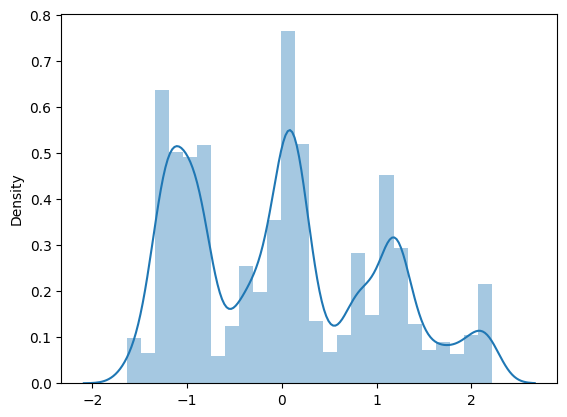

In [ ]:
from sklearn.preprocessing import StandardScaler # For scaling
import seaborn as sns # For plotting

# Initiate the object for the standard scaler
scale = StandardScaler()
input_scaled = scale.fit_transform(input_over) # Fit the data to the scaler

# Check
sns.distplot(input_scaled[:,1])

### Label Encoding

Since we have two output classes, we need to split the output values to two different columns, this is called [one-hot encoding](https://medium.com/geekculture/machine-learning-one-hot-encoding-vs-integer-encoding-f180eb831cf1#:~:text=One%20advantage%20of%20one-hot,rest%20are%20set%20to%200.). It allows our model to learn more efficiently and effectively by eliminating any assumption that one class is closer to the other or has a hierarchy or order.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils

encoder = LabelEncoder()
encoder.fit(target_over)
encoded_target = encoder.transform(target_over)

dummy_target = utils.to_categorical(encoded_target)

## Create the Base Model

In [ ]:
pip install scikeras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
def baseline_model():
  model = Sequential()
  model.add(Dense(8, input_dim=5, activation='relu'))
  model.add(Dense(2, activation='sigmoid'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [ ]:
# Build the model and determine training parameters
estimator = KerasClassifier(model=baseline_model, epochs=200, batch_size=5, verbose=0)

## Evaluate using k-fold cross validation

In [ ]:
# Fixed seed
seed = 7
np.random.seed(seed)

kfold = KFold(n_splits=10, shuffle=True, random_state=seed) # Evaluate using kflod

In [ ]:
# Train the model

results = cross_val_score(estimator, input_scaled, dummy_target, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 99.29% (0.13%)


## Adjustment of Hidden Layers

In [ ]:
def modified_model():
  model = Sequential()
  model.add(Dense(16, input_dim=5, activation='relu'))
  model.add(Dense(8, input_dim=5, activation='relu'))
  model.add(Dense(4, input_dim=5, activation='relu'))
  model.add(Dense(2, activation='sigmoid'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [ ]:
# Build the model and determine training parameters
estimator = KerasClassifier(model=modified_model, epochs=200, batch_size=5, verbose=0)

In [ ]:
# Fixed seed
seed = 7
np.random.seed(seed)

kfold = KFold(n_splits=10, shuffle=True, random_state=seed) # Evaluate using kflod

In [ ]:
# Train the model

results = cross_val_score(estimator, input_scaled, dummy_target, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 99.32% (0.19%)


## Evaluation

The base model provided us with a well versed model reaching roughly 99% accuracy, although this is a good sign that our model works, the modified model resulted in a 0.04% increase in accuracy which is essentially identical to the base model.

# Regression

## Loading the Dataset

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# store dataset in a pandas dataframe
concrete_data = concrete_compressive_strength.data.original

concrete_data.info() # Check for null values, data types, and number of entries per feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


After confirming that there are no null values and their respective data types we will now proceed to pre-processing

## Pre-processing

## Transformation of Data Types

In [ ]:
concrete_data["Age"] = concrete_data["Age"].astype("float64")
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   float64
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


After transforming the variables to similar data types, we can now proceed to clearing any outliers in the dataset

## Separation of Training and Test Datasets

Since we only have one dataset, we will need to split it into a test dataset and train dataset. This will be done by using the `train_test_split` function from sklearn, and will be put inside a [new dataframe](https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/) with the same features, including its [target variable](https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/).

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features, excluding the target variable
features = concrete_data.columns.difference(['Concrete compressive strength'])
X = concrete_data.iloc[:, :-1].values # Get the values of each feature
y = concrete_data["Concrete compressive strength"].values # Get the values of the target variable

# Split the data into 4 parts: X_train, X_test, y_train, and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

# Create a new dataframe containing the values of X_train
concrete_data_train = pd.DataFrame(X_train, columns=features)
concrete_data_train["Concrete compressive strength"] = y_train # Insert a new column that contains the y_train

# Repeat with test dataframe
concrete_data_test = pd.DataFrame(X_test, columns=features)
concrete_data_test["Concrete compressive strength"] = y_test

# Check both dataframes if it is indeed a 75-25 split as well as its data types and entries.
concrete_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            772 non-null    float64
 1   Blast Furnace Slag             772 non-null    float64
 2   Cement                         772 non-null    float64
 3   Coarse Aggregate               772 non-null    float64
 4   Fine Aggregate                 772 non-null    float64
 5   Fly Ash                        772 non-null    float64
 6   Superplasticizer               772 non-null    float64
 7   Water                          772 non-null    float64
 8   Concrete compressive strength  772 non-null    float64
dtypes: float64(9)
memory usage: 54.4 KB


In [ ]:
concrete_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            258 non-null    float64
 1   Blast Furnace Slag             258 non-null    float64
 2   Cement                         258 non-null    float64
 3   Coarse Aggregate               258 non-null    float64
 4   Fine Aggregate                 258 non-null    float64
 5   Fly Ash                        258 non-null    float64
 6   Superplasticizer               258 non-null    float64
 7   Water                          258 non-null    float64
 8   Concrete compressive strength  258 non-null    float64
dtypes: float64(9)
memory usage: 18.3 KB


### Removing the Outliers

In [ ]:
concrete_data_train.describe() # Check statistics

,Age,Blast Furnace Slag,Cement,Coarse Aggregate,Fine Aggregate,Fly Ash,Superplasticizer,Water,Concrete compressive strength
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.038472,70.514508,53.123575,181.065026,6.104275,974.396244,776.196762,44.340674,35.364365
std,105.948132,84.113992,64.238738,21.110430,6.010345,77.679293,79.916018,61.087649,17.028949
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,191.675000,0.000000,0.000000,164.900000,0.000000,932.000000,734.300000,7.000000,22.810000
50%,277.000000,19.500000,0.000000,185.000000,6.100000,968.000000,780.600000,28.000000,33.725000
75%,359.000000,141.600000,118.225000,192.000000,10.100000,1038.500000,825.500000,56.000000,45.317500
max,540.000000,342.100000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


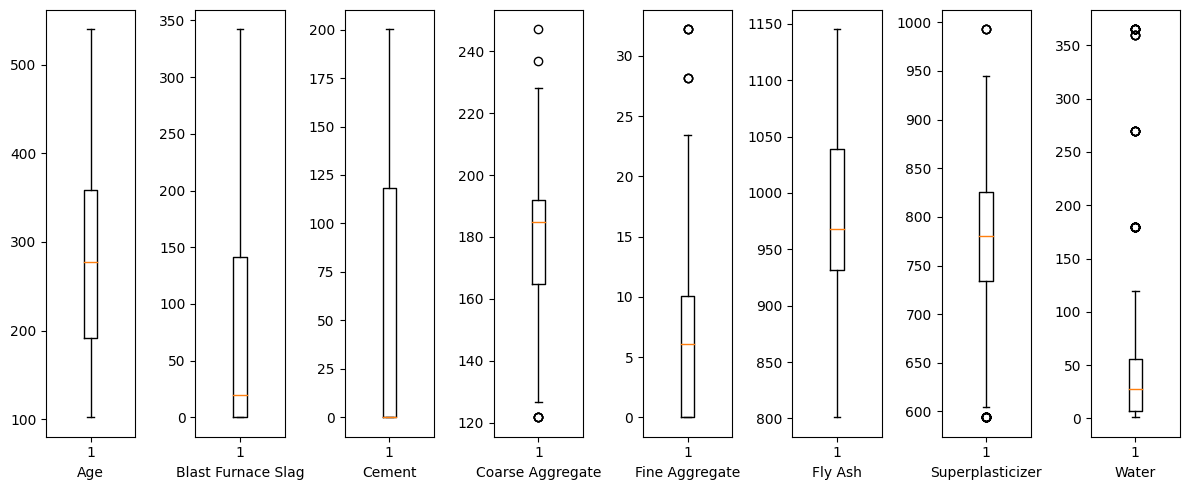

In [ ]:
import matplotlib.pyplot as plt # For plotting

# Create subplots
fig, axs = plt.subplots(1, 8, figsize=(12, 5))
features = concrete_data_train.columns

# Create boxplots for each feature
for item in range(8):
  axs[item].boxplot(concrete_data_train[features[item]])
  axs[item].set_xlabel(f"{features[item]}")

# Show the boxplots
plt.tight_layout()
plt.show()

In [ ]:
# Get the attributes
attributes = concrete_data_train.columns.difference(['Concrete compressive strength'])

data = concrete_data_train

for item in attributes:
  # Calculation for 1st and 3rd Quartile
  Q1 = data[item].quantile(0.25)
  Q3 = data[item].quantile(0.75)

  # Calculation for the Interquartile Range (IQR)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5*IQR)
  upper_bound = Q3 + (1.5*IQR)

  # Identification of the outliers' index in the dataset
  filtered = data[(data[item] >= lower_bound) & (data[item] <= upper_bound)]

  # Creating a set of data WITHOUT the outlieers
  data = filtered

# Creation of new dataframe that is free from outliers
concrete_clean = data
concrete_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 0 to 771
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            701 non-null    float64
 1   Blast Furnace Slag             701 non-null    float64
 2   Cement                         701 non-null    float64
 3   Coarse Aggregate               701 non-null    float64
 4   Fine Aggregate                 701 non-null    float64
 5   Fly Ash                        701 non-null    float64
 6   Superplasticizer               701 non-null    float64
 7   Water                          701 non-null    float64
 8   Concrete compressive strength  701 non-null    float64
dtypes: float64(9)
memory usage: 54.8 KB


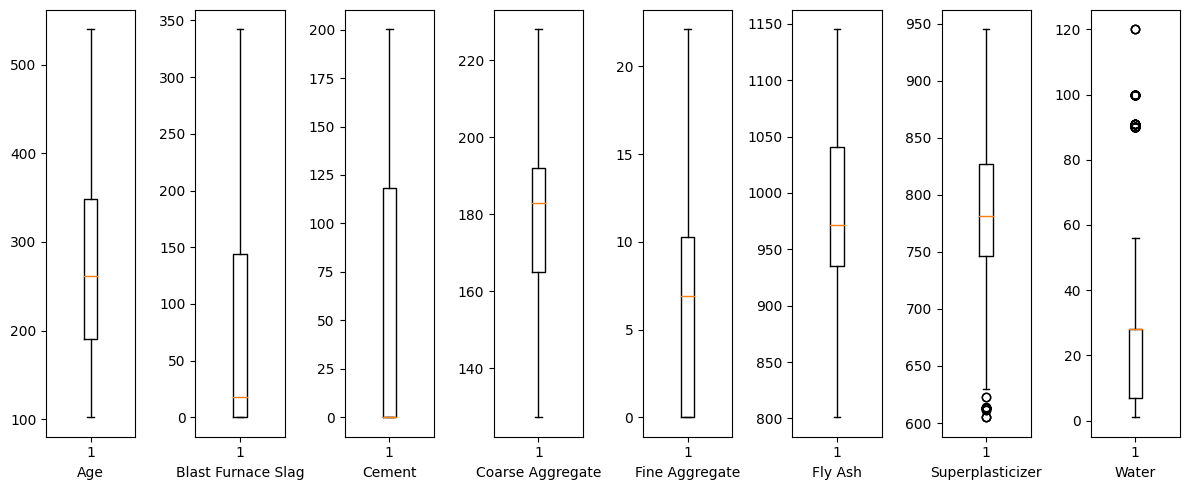

In [ ]:
import matplotlib.pyplot as plt # For plotting

# Create subplots
fig, axs = plt.subplots(1, 8, figsize=(12, 5))
features = concrete_clean.columns

# Create boxplots for each feature
for item in range(8):
  axs[item].boxplot(concrete_clean[features[item]])
  axs[item].set_xlabel(f"{features[item]}")

# Show the boxplots
plt.tight_layout()
plt.show()

We can see that 'new' outliers have formed after removing the outliers in the original dataset. Although this is possible, [sources](https://stats.stackexchange.com/questions/492995/removing-outliers-renders-a-new-distribution-that-has-its-own-outliers#:~:text=For%20example%2C%20if%20data%20are,its%20own%2C%20and%20so%20on.) state that this could be a result of a well distributed dataset or extreme entries. Further iterations of outlier removal may result in ignoring a "substantial and legitimate" portion of our dataset.

Thus it is recommended to conduct outlier removal only [once](https://stackoverflow.com/questions/71160676/dataset-with-new-outliers-after-removing-the-outliers) to prevent dropping datapoints that may be crucial in our model's performance

## Create the Base Model

In [ ]:
def baseline_model():

  model = Sequential()
  model.add(Dense(16, input_shape=(X_train.shape[1],), kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [ ]:
from scikeras.wrappers import KerasRegressor
# Biuld the model and define its parameters
estimator = KerasRegressor(model=baseline_model, epochs=100, batch_size=5, verbose=0)

# Evaluate using kfold
kfold = KFold(n_splits=10)

In [ ]:
# Train the model and show results
results = cross_val_score(estimator, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -48.17 (7.19) MSE


## Improve by Standardizing the Dataset

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Initialize estimators object
estimators = []

# Standardize the data usng StandardScaler
estimators.append(('standardize', StandardScaler()))


# Build the model and set parameters
estimators.append(('mlp', KerasRegressor(model=baseline_model, epochs=100, batch_size=5, verbose=0)))

# Use pipelines to increase efficiency by doing multiple tasks at once
pipeline = Pipeline(estimators)

# Evaluate using kfold
kfold = KFold(n_splits=10)

In [ ]:
# Train the model and show results
results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -94.46 (34.29) MSE


## Tuning of Layers and Neurons

In [ ]:
def small_model():

  model = Sequential()
  model.add(Dense(8, input_shape=(X_train.shape[1],), kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', optimizer='adam')
  return model


def medium_model():

  model = Sequential()
  model.add(Dense(8, input_shape=(X_train.shape[1],), kernel_initializer='normal', activation='relu'))
  model.add(Dense(4, kernel_initializer='normal'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', optimizer='adam')
  return model


def large_model():

  model = Sequential()
  model.add(Dense(36, input_shape=(X_train.shape[1],), kernel_initializer='normal', activation='relu'))
  model.add(Dense(18, kernel_initializer='normal'))
  model.add(Dense(9, kernel_initializer='normal'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', optimizer='adam')
  return model


def deep_model():

  model = Sequential()
  model.add(Dense(8, input_shape=(X_train.shape[1],), kernel_initializer='normal', activation='relu'))
  model.add(Dense(4, kernel_initializer='normal'))
  model.add(Dense(2, kernel_initializer='normal'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', optimizer='adam')
  return model


def wide_model():

  model = Sequential()
  model.add(Dense(36, input_shape=(X_train.shape[1],), kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [ ]:
# Initialize estimators object
estimators = []

# Standardize the data usng StandardScaler
estimators.append(('standardize', StandardScaler()))


# Build the model and set parameters
estimators.append(('mlp', KerasRegressor(model=small_model, epochs=100, batch_size=5, verbose=0)))

# Use pipelines to increase efficiency by doing multiple tasks at once
pipeline = Pipeline(estimators)

# Evaluate using kfold
kfold = KFold(n_splits=10)

# Train the model and show results
results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -105.04 (23.18) MSE


In [ ]:
# Initialize estimators object
estimators = []

# Standardize the data usng StandardScaler
estimators.append(('standardize', StandardScaler()))


# Build the model and set parameters
estimators.append(('mlp', KerasRegressor(model=medium_model, epochs=100, batch_size=5, verbose=0)))

# Use pipelines to increase efficiency by doing multiple tasks at once
pipeline = Pipeline(estimators)

# Evaluate using kfold
kfold = KFold(n_splits=10)

# Train the model and show results
results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -107.97 (16.09) MSE


In [ ]:
# Initialize estimators object
estimators = []

# Standardize the data usng StandardScaler
estimators.append(('standardize', StandardScaler()))


# Build the model and set parameters
estimators.append(('mlp', KerasRegressor(model=large_model, epochs=100, batch_size=5, verbose=0)))

# Use pipelines to increase efficiency by doing multiple tasks at once
pipeline = Pipeline(estimators)

# Evaluate using kfold
kfold = KFold(n_splits=10)

# Train the model and show results
results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -108.63 (16.10) MSE


In [ ]:
# Initialize estimators object
estimators = []

# Standardize the data usng StandardScaler
estimators.append(('standardize', StandardScaler()))


# Build the model and set parameters
estimators.append(('mlp', KerasRegressor(model=deep_model, epochs=100, batch_size=5, verbose=0)))

# Use pipelines to increase efficiency by doing multiple tasks at once
pipeline = Pipeline(estimators)

# Evaluate using kfold
kfold = KFold(n_splits=10)

# Train the model and show results
results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -107.56 (15.29) MSE


In [ ]:
# Initialize estimators object
estimators = []

# Standardize the data usng StandardScaler
estimators.append(('standardize', StandardScaler()))


# Build the model and set parameters
estimators.append(('mlp', KerasRegressor(model=wide_model, epochs=100, batch_size=5, verbose=0)))

# Use pipelines to increase efficiency by doing multiple tasks at once
pipeline = Pipeline(estimators)

# Evaluate using kfold
kfold = KFold(n_splits=10)

# Train the model and show results
results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -50.31 (9.91) MSE


## Evaluation

Listed are the models used and their corresponding MSE rating
- Baseline w/ -94.46 (34.29) MSE
- Small w/ -105.04 (23.18) MSE
- Medium w/ -107.97 (16.09) MSE
- Large w/ -108.63 (16.10) MSE
- Deep w/ -107.56 (15.29) MSE
- Wide w/ -50.31 (9.91) MSE

Here we can see the difference in the models and their corresponding MSE rating and standard deviation.

Based on our dataset, the Wide model provided us with the least amount of std as well as least MSE, making it the most accurate.